# Take a look in the Data


Here it’s the link for retrieving the Cluster and the BCG catalog


In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


In [7]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,275146375168,0.140456,19.50224,0.030477,275146375168,0.072205,19.22245,0.123366,275280592896,0.053708
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,275213484104,0.131673,19.63543,0.044110,275213615176,0.067690,19.09973,0.105809,275347701832,0.050349
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,275154731264,0.128807,21.88973,0.247275,142737921,0.066217,21.17625,0.595782,18014398643716097,0.049253
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,275154764032,0.140669,21.11993,0.117129,45036271420080128,0.072315,19.88870,0.434835,9007199388991489,0.053789


v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

Distance from the Center
---------------------------------------

To have the phase space we need first to compute the distance from the center, $R/R_{200}$.

In [108]:
id1  = np.loadtxt('cluster_cid.npy').astype(int)
id0  = np.loadtxt('cluster_gid.npy').astype(int)
rnorm= np.loadtxt('cluster_radii.npy').astype(float)

(array([2604., 4611., 5427., 5895., 6555., 7210., 7801., 8270., 8415.,
        5912.]),
 array([6.99710471e-04, 2.20629690e-01, 4.40559670e-01, 6.60489650e-01,
        8.80419630e-01, 1.10034961e+00, 1.32027959e+00, 1.54020957e+00,
        1.76013955e+00, 1.98006953e+00, 2.19999951e+00]),
 <BarContainer object of 10 artists>)

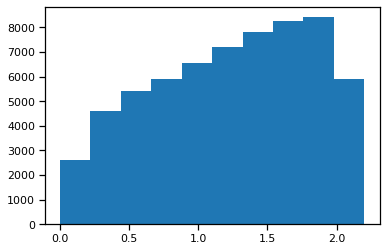

In [109]:
plt.hist(rnorm)

In [82]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.constants import G

cosmo = FlatLambdaCDM(H0=70, Om0=0.283)
Msol = 1.98847e33
Mpc2cm = 3.086e+24
rad2deg= 180/np.pi
h=0.7

def AngularDistance(z):
    DA = float( (cosmo.luminosity_distance(z)/(1+z)**2)/u.Mpc ) # in Mpc
    return DA
AngularDistance = np.vectorize(AngularDistance)

#--- Critical universe density
def rhoc(z):
    try:
        rho_c = float(cosmo.critical_density(z)/(u.g/u.cm**3)) # in g/cm**3
    except:
        rho_c = [float(cosmo.critical_density(zi)/(u.g/u.cm**3)) for zi in z]
        rho_c = np.array(rho_c)
    
    rho_c = rho_c*(Mpc2cm**3)/Msol # in Msol/Mpc**3
    return rho_c

def vcirc(mass,redshift,mdef,cosmo):
    '''Calculate circular velocity in km/s for halos of mass M (Msun/h)'''
    rho_crit = cosmo.critical_density(redshift)
    if mdef[-1] == 'c':
        delta = int(mdef[:-1])
        rho = delta*rho_crit
    elif mdef[-1] == 'm':
        delta = int(mdef[:-1])
        rho = delta*rho_crit*cosmo.Om(redshift)
    else:
        raise RuntimeError("Not correct mass definition")
    v = np.sqrt(G*(np.pi*4*rho/3)**(1./3)*(mass*u.Msun/cosmo.h)**(2./3))
    a = v.to(u.km/u.s)
    return a.value

In [83]:
#DA = AngularDistance(zcls)

def convertDegreeToMpc(theta,z):
    da     = AngularDistance(z)
    length = (theta*np.pi/180)*da
    return length

def convertR200toM200(R200,z, nc=200):
    ## M200 in solar masses
    ## R200 in Mpc
    rho = rhoc(z)
    M200 = nc*4*np.pi*rho*R200**3/3
    return M200

In [98]:
r200_deg0= Cluster_data.R200C_DEG.to_numpy()#[id1]
z0       = Cluster_data.CLUZSPEC.to_numpy()#[id1]

r200     = convertDegreeToMpc(r200_deg0,z0)[id1]
zcls     = z0[id1]

In [99]:
m200 = convertR200toM200(r200,zcls)
vc   = vcirc(m200,zcls,'200c',cosmo)

vlosn = vlos/vc

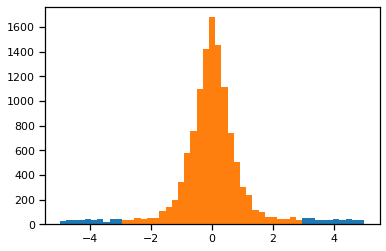

In [128]:
cut = np.abs(vlosn)<=3

_ = plt.hist(vlosn,bins=np.linspace(-5.,5.,50))
_ = plt.hist(vlosn[cut],bins=np.linspace(-5.,5.,50))

In [129]:
import seaborn as sns
sns.set_context('notebook')

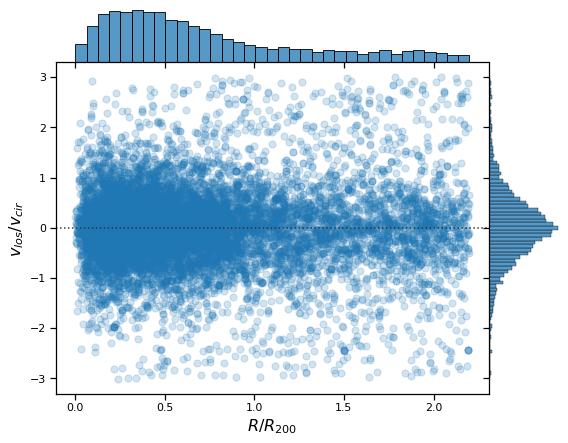

In [130]:
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="scatter", s=10, alpha=0.3, space=0)
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)},ylim=(-1650,1650))
ax = sns.jointplot(x=rnorm[cut], y=vlosn[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)})
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}/v_{cir}$ ', fontsize=16)
ax.fig.set_figwidth(8)


## Assign Orbital Classification

In [118]:
from sklearn.ensemble import RandomForestClassifier
import joblib
loaded_rf = joblib.load("../phase_space/classification_2d_rf.joblib")

/usr/local/anaconda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/anaconda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [119]:
gal = pd.DataFrame ({ 'r2d':rnorm, 'vlos':vlosn})
tags = loaded_rf.predict(gal) 
#predicted tag: 0 = orbiting, 1 = infalling, 2 = background

In [120]:
tag_probability = loaded_rf.predict_proba(gal) 

In [122]:
tag_probability

array([[0.95, 0.05, 0.  ],
       [0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.  , 0.56, 0.44],
       [0.  , 0.52, 0.48]])

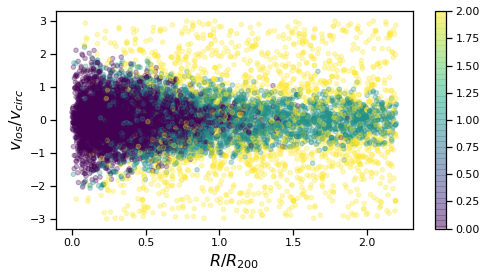

In [131]:
plt.figure(figsize=(8,4))
plt.scatter(rnorm[cut],vlosn[cut],c=tags[cut],alpha=0.3,s=20)
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}/ v_{circ} $',fontsize=16)
plt.colorbar()